
**Биномиальный закон с параметрами:**

 **n=100, p=0,05.**


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

**$1.$ Получить 100 случайных значений случайной величины, распределенной по заданному закону.**

In [2]:
n = 100
p = 0.05

# Параметр seed=42 используется для установления начального значения генератора случайных чисел, чтобы можно было воспроизвести результаты в дальнейшем
np.random.seed(42) 
data = np.random.binomial(n, p, size=100)
data

array([ 4,  9,  6,  5,  3,  3,  2,  7,  5,  6,  1,  9,  7,  3,  3,  3,  4,
        5,  4,  4,  5,  3,  4,  4,  5,  7,  3,  5,  5,  2,  5,  3,  2,  9,
        9,  7,  4,  2,  6,  5,  3,  5,  1,  8,  4,  6,  4,  5,  5,  3,  9,
        7,  9,  8,  5,  8,  2,  3,  2,  4,  4,  4,  7,  4,  4,  5,  3,  7,
        2, 10,  7,  3,  0,  7,  6,  6,  7,  2,  4,  2,  7,  6,  4,  2,  4,
        4,  6,  6,  8,  5,  3,  6,  6,  5,  7,  5,  5,  4,  1,  2])

**$2.$ Обработать выборку методом  "сгруппированных данных" и построить таблицу соответствующего статистического ряда.**

In [3]:
df = pd.DataFrame(data, columns=['Data'])

frequency_table = df['Data'].value_counts().sort_index()
frequency_table

0      1
1      3
2     11
3     14
4     19
5     18
6     11
7     12
8      4
9      6
10     1
Name: Data, dtype: int64

**$3.$ Вычислить выборочные среднее, дисперсию, асимметрию и эксцесс.**


Выборочное среднее: $\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n}x_i$

In [4]:
mean = df['Data'].mean()

mean

4.79

Дисперсия: $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \hat{\mu})^2$

In [5]:
variance = df['Data'].var()

variance

4.6322222222222225

Ассиметрия: $\hat{\gamma_1} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left(\frac{x_i - \hat{\mu}}{\hat{\sigma}}\right)^3$

In [6]:
skewness = df['Data'].skew()

skewness

0.27793611582512595

Эксцесс: $\hat{\gamma_2} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \left(\frac{x_i - \hat{\mu}}{\hat{\sigma}}\right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$

In [7]:
kurtosis = df['Data'].kurtosis()

kurtosis

-0.4326009010683771

**Построить гистограмму и график эмпирической функции распределения**

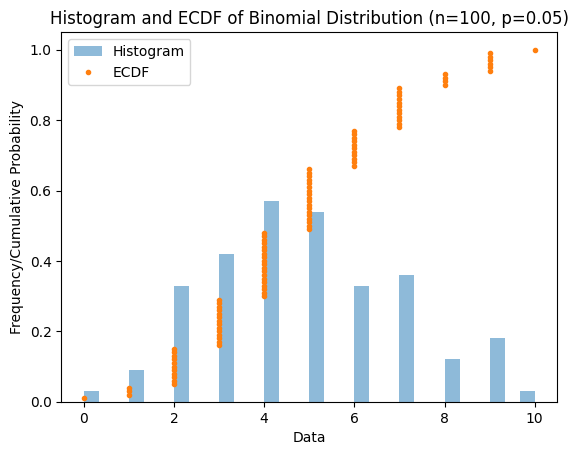

In [8]:
plt.hist(df['Data'], bins=30, density=True, alpha=0.5, label='Histogram')

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(df['Data'])
plt.plot(x, y, marker='.', linestyle='none', label='ECDF')

plt.xlabel('Data')
plt.ylabel('Frequency/Cumulative Probability')
plt.title('Histogram and ECDF of Binomial Distribution (n=100, p=0.05)')
plt.legend();

**$4.$ Построить доверительные интервалы для выборочного среднего и дисперсии с надежностью 0,95.**


Доверительный интервал для среднего:
$\bar{x} \pm z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$

Доверительный интервал для дисперсии:
$\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2}}(n-1)} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2}}(n-1)}$

где:

$\bar{x}$ - среднее значение выборки

$z_{\frac{\alpha}{2}}$ - критическое значение стандартного нормального распределения с уровнем значимости $\alpha$

$\sigma$ - стандартное отклонение выборки

$n$ - размер выборки

$s^2$ - дисперсия выборки

$\chi^2_{\frac{\alpha}{2}}(n-1)$ и $\chi^2_{1-\frac{\alpha}{2}}(n-1)$ - критические значения распределения $\chi^2$ с $(n-1)$ степенями свободы и уровнем значимости $\frac{\alpha}{2}$ и соответственно $1-\frac{\alpha}{2}$.

In [9]:
mean_confidence_interval = stats.norm.interval(0.95, loc=mean, scale=np.sqrt(variance/100))
variance_confidence_interval = stats.chi2.interval(0.95, df=100-1, scale=variance/100)

print("Доверительный интервал для среднего:", mean_confidence_interval)
print("Доверительный интервал для дисперсии:", variance_confidence_interval)

Доверительный интервал для среднего: (4.368164831777021, 5.211835168222979)
Доверительный интервал для дисперсии: (3.3982482590829073, 5.948791896179669)


**$5.$ Проверить статистическую гипотезу о соответствии выборочного закона распределения заданному в п.1 при помощи критериев Пирсона и Колмогорова (уровень значимости 0,05).**


In [10]:
pearson_statistic, pearson_p_value = stats.pearsonr(df['Data'], np.random.binomial(n, p, size=100))
print("критерий Пирсона:", pearson_statistic, pearson_p_value)

kolmogorov_statistic, kolmogorov_p_value = stats.kstest(df['Data'], 'binom', args=(n,p))
print("критерий Колмогорова-Смирнова:", kolmogorov_statistic, kolmogorov_p_value)

критерий Пирсона: -0.03945418211361957 0.6967337987723925
критерий Колмогорова-Смирнова: 0.14598130068571175 0.025282189280117162


Гипотеза принимается, если значение p-value > 0.05, в противном случае она отвергается:

In [11]:
if (pearson_p_value > 0.05) and (kolmogorov_p_value > 0.05):
    print("Выборочные данные подчиняются заданному биномиальному распределению с n=100 и p=0,05")
else:
    print("Выборочные данные не подчиняются заданному биномиальному распределению с n=100 и p=0,05")

Выборочные данные не подчиняются заданному биномиальному распределению с n=100 и p=0,05


**$6.$ Даны значения трёх факторов X, Y, Z каждый на двух уровнях (всего 8 наборов значений), для каждого из них известно экспериментальное значение (в задании – случайное). Найти методом полного факторного эксперимента линейное уравнение регрессии.**

In [12]:
# создаем случайные значения для каждого из 8 наборов
n = 100
p = 0.05

# Генерируем случайные данные для трех факторов X, Y, Z на двух уровнях
X = np.random.binomial(n, p, size=(8, 1))
Y = np.random.binomial(n, p, size=(8, 1))
Z = np.random.binomial(n, p, size=(8, 1))

# Генерируем случайные экспериментальные значения
E = np.random.normal(0, 1, size=(8, 1))

# Объединяем факторы в единый массив
data = np.hstack((X, Y, Z))

# Определяем независимую переменную x
x = sm.add_constant(data)

# Определяем зависимую переменную y
y = np.random.binomial(n, p, size=(8,1))

# Проводим регрессионный анализ
model = sm.OLS(y, x).fit()

# выводим линейное уравнение регрессии
# в выводе мы получим линейное уравнение регрессии вместе с дополнительной информацией, такой как коэффициенты, p-value и R-squared.
print(model.summary());

# выводим коэффициенты уравнения регрессии
print("Coefficients: ", model.params)
print("Intercept: ", model.params[0])
print("X: ", model.params[1])
print("Y: ", model.params[2])
print("Z: ", model.params[3])

# выводим уравнение регрессии с коэффициентами
equation = "y = {0:.5f} + {1:.5f}*X + {2:.5f}*Y + {3:.5f}*Z".format(model.params[0], model.params[1], model.params[2], model.params[3])
print('Уравнение регрессии с коэффициентами', equation)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                 -0.238
Method:                 Least Squares   F-statistic:                    0.5508
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.674
Time:                        06:19:39   Log-Likelihood:                -13.805
No. Observations:                   8   AIC:                             35.61
Df Residuals:                       4   BIC:                             35.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4139      2.613      1.307      0.2

F:\my_code\projects\my_projects\stat_data_analysis\env\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
